In [25]:
# importing libraries  
import numpy as np  
import matplotlib.pyplot as mtp  
import pandas as pd  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [26]:
df = pd.read_csv("data/data_moods.csv")

In [27]:
col_features = df.columns[6:-3]
# X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y = df['mood']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X2,Y,test_size=0.2,random_state=15)
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)

# X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X2,encoded_y,test_size=0.6,random_state=15)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [19]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [20]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  final_predictions = final_model.predict(test_stack)

KNeighborsClassifier()

In [21]:
y_pred= classifier.predict(x_test)  

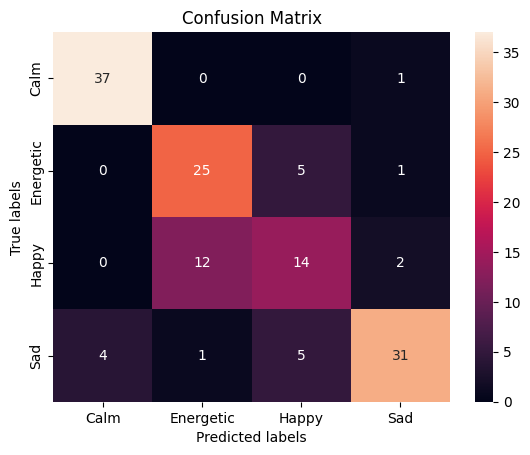

Accuracy Score 0.7753623188405797


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(y_test,y_pred))